# Week 2 : Done delivery
    Congnitive systems methods
    Thi Le Thanh - 29/1/2018
    Metropolia UAS

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn import cluster
import matplotlib.pyplot as plt

In [2]:
# read data 
df = pd.read_csv('drone_delivery_v1.csv',sep=';')
df.head(10)

,clientid,x,y
0,1,622.771572,164.857623
1,2,416.357298,630.193634
2,3,292.735020,567.333231
3,4,737.211288,166.225676
4,5,540.475375,682.912298
5,6,535.469492,318.439661
6,7,640.380050,870.833221
7,8,235.772075,359.048203
8,9,481.896884,661.491838
9,10,730.032789,312.177817


In [3]:
# Drop insignificant values
df = df.drop(['clientid'], axis=1)
df.head(10)

,x,y
0,622.771572,164.857623
1,416.357298,630.193634
2,292.735020,567.333231
3,737.211288,166.225676
4,540.475375,682.912298
5,535.469492,318.439661
6,640.380050,870.833221
7,235.772075,359.048203
8,481.896884,661.491838
9,730.032789,312.177817


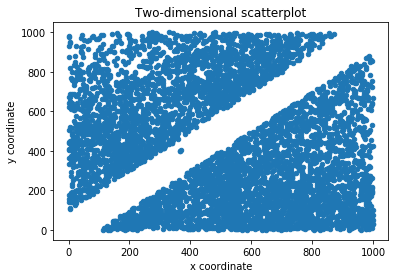

In [4]:
# Visualize the client locations in 2D
df.plot.scatter('x', 'y')
plt.xlabel('x coordinate')
plt.ylabel('y coordinate')
plt.title('Two-dimensional scatterplot')
plt.show()

In [5]:
# Basic statistic
df.describe()

,x,y
count,5956.000000,5956.000000
mean,508.823177,427.554772
std,271.061462,289.044640
min,0.017692,0.043285
25%,282.582920,170.079921
50%,518.100892,397.786441
75%,727.156497,669.982518
max,999.533215,999.731720


In [6]:
#  k-means clustering for three drone depots
k = 3
kmeans = cluster.KMeans(n_clusters=k)
kmeans.fit(df)

centroids = kmeans.cluster_centers_
labels = kmeans.labels_
print(centroids)
print(labels)

[[ 549.76856064  787.58546172]
 [ 700.78995895  211.12310438]
 [ 197.20147541  386.08223926]]
[1 0 2 ..., 2 1 1]


            x           y
0  549.768561  787.585462
1  700.789959  211.123104
2  197.201475  386.082239


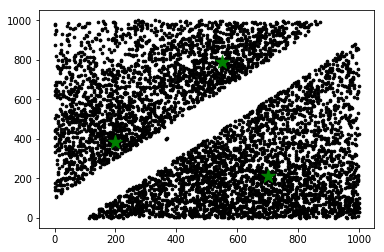

In [7]:
#Make a scatterplot
colnames = df.columns.get_values()

# create a pandas data frame with columns
centroids_df = pd.DataFrame(centroids, columns=colnames)
print(centroids_df)

f1 = df['x'].values
f2 = df['y'].values

C_x = centroids_df['x'].values
C_y = centroids_df['y'].values
plt.scatter(f1, f2, c='black', s=7)
plt.scatter(C_x, C_y, marker='*', s=200, c='g')
plt.show()

In [8]:
# Attach the information on the closest depot to each client
lb = pd.DataFrame({'Cluster' : labels.tolist()})

labels_df = pd.concat([df, lb], axis=1, join='inner')
labels_df.head(10)


,x,y,Cluster
0,622.771572,164.857623,1
1,416.357298,630.193634,0
2,292.735020,567.333231,2
3,737.211288,166.225676,1
4,540.475375,682.912298,0
5,535.469492,318.439661,1
6,640.380050,870.833221,0
7,235.772075,359.048203,2
8,481.896884,661.491838,0
9,730.032789,312.177817,1


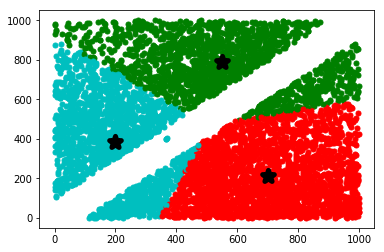

In [9]:
#Make a scatterplot that uses three different colours
colors = ['g.','r.','c.','b.','y.','m.','k.','w.']
for i in range(len(df)):
    plt.plot(df.iat[i, 0], df.iat[i, 1], colors[labels[i]], markersize = 10)
plt.scatter(centroids[:, 0],centroids[:, 1]
            , marker = "*", s=150,c ='black', linewidths = 5, zorder = 10)
plt.show()

In [10]:
# Play with the number of depots.
k1 = 7
kmeans2 = cluster.KMeans(n_clusters=k1)
kmeans2.fit(df)

centroids2 = kmeans2.cluster_centers_
labels2 = kmeans2.labels_
print(centroids2)
print(labels2)

[[ 241.51202267  768.76827693]
 [ 555.74957712  199.43560759]
 [ 842.77319282  144.25171262]
 [ 279.21292368   96.40831267]
 [ 570.12556291  832.23559861]
 [ 824.10609216  544.95187801]
 [ 170.26585386  450.06439712]]
[1 0 6 ..., 0 5 1]


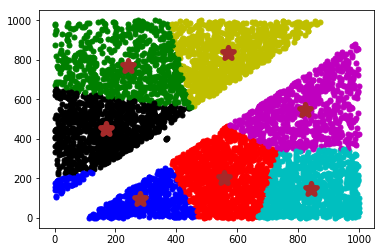

In [11]:
# Make a scatterplot that uses different colours
colors = ['g.','r.','c.','b.','y.','m.','k.']
for i in range(len(df)):
    plt.plot(df.iat[i, 0], df.iat[i, 1], colors[labels2[i]], markersize = 10)
plt.scatter(centroids2[:, 0],centroids2[:, 1]
            , marker = "*", s=150,c ='brown', linewidths = 5, zorder = 10)
plt.show()

# 7 clusters is a highest I can display cause no more colors availabel to show. 
# Of course it takes slower, very very slower to run with more cluster.

In [12]:
# Hierarchichal clustering